In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots, plot_dist_hist

In [2]:
ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\0\results")
eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\1\results")
ec_base_line_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\0\base_line")
eo_base_line_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\mpi_lemon\1\base_line")

In [3]:
ec_results = np.zeros(
    (   
        200,
        5,
        5
    )
)

In [4]:
eo_results = np.zeros(
    (   
        200,
        5,
        5
    )
)

In [5]:
ec_base_line = np.zeros(
    (   
        200,
        5
    )
)

In [6]:
eo_base_line = np.zeros(
    (   
        200,
        5
    )
)

In [7]:
for i, pth in enumerate(ec_folder.iterdir()):
    current = np.load(pth)
    ec_results[i, :, :] = current.copy()

In [8]:
for i, pth in enumerate(eo_folder.iterdir()):
    current = np.load(pth)
    eo_results[i, :, :] = current.copy()

In [9]:
for i, pth in enumerate(ec_base_line_folder.iterdir()):
    current = np.load(pth)
    ec_base_line[i, :] = current.copy()

In [10]:
for i, pth in enumerate(eo_base_line_folder.iterdir()):
    current = np.load(pth)
    eo_base_line[i, :] = current.copy()

In [11]:
results = ec_results.__add__(eo_results)/2

In [12]:
base_line = ec_base_line.__add__(eo_base_line)/2

In [13]:
print(np.argwhere(np.isnan(results)))
print(np.argwhere(np.isinf(results)))

[[ 69   2   1]
 [ 69   2   2]
 [ 69   2   3]
 [ 69   2   4]
 [ 70   2   1]
 [ 70   2   2]
 [ 70   2   3]
 [ 70   2   4]
 [106   2   1]
 [106   2   2]
 [106   2   3]
 [106   2   4]]
[]


In [14]:
results = np.delete(results, 69, axis=0)
results = np.delete(results, 69, axis=0)
results = np.delete(results, 104, axis=0)

base_line = np.delete(base_line, 69, axis=0)
base_line = np.delete(base_line, 69, axis=0)
base_line = np.delete(base_line, 104, axis=0)


In [15]:
print(base_line.size)
print(results.size)

985
4925


In [16]:
results[:, :, 2] -= results[:, :, 1]

In [17]:
base_line[:, 2] -= base_line[:, 1]

BASELINE PERFORMANCE

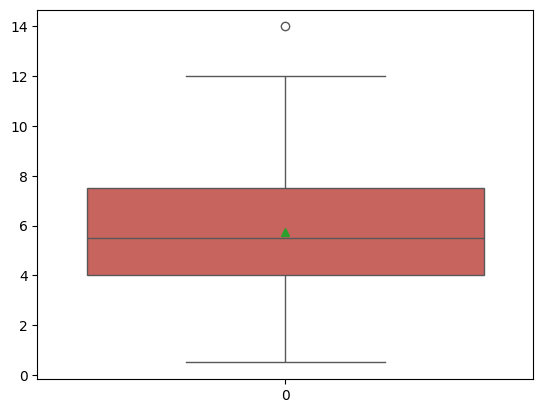

In [18]:
plot_n_boxplots([base_line[:, 1].flatten()], [sns.xkcd_rgb["pale red"]])

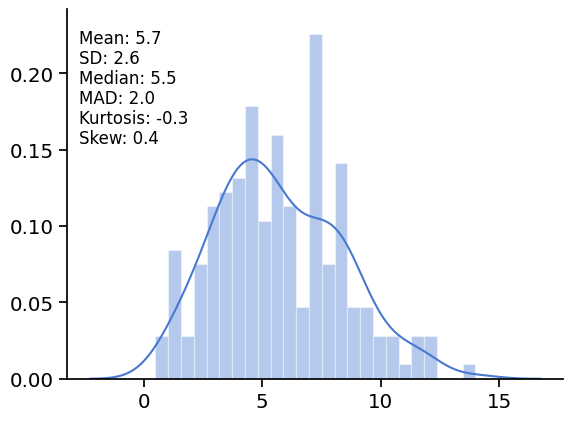

In [19]:
plot_dist_hist(base_line[:, 1])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_brain_baseline")

In [20]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\base_line", base_line[:, 1])

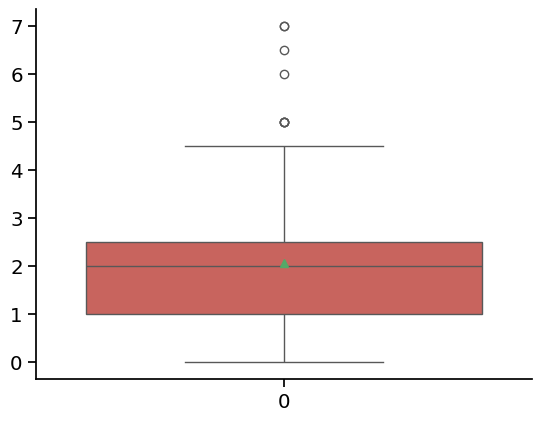

In [21]:
plot_n_boxplots([base_line[:, 2].flatten()], [sns.xkcd_rgb["pale red"]])

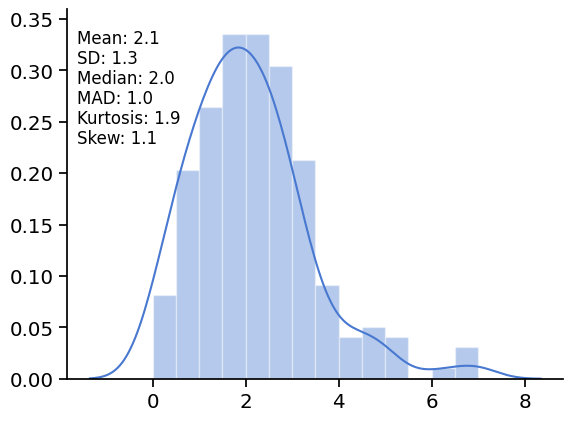

In [22]:
plot_dist_hist(base_line[:, 2])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_artefact_baseline")

In [23]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\base_line", base_line[:, 2])

THEN MY ALGORITHM

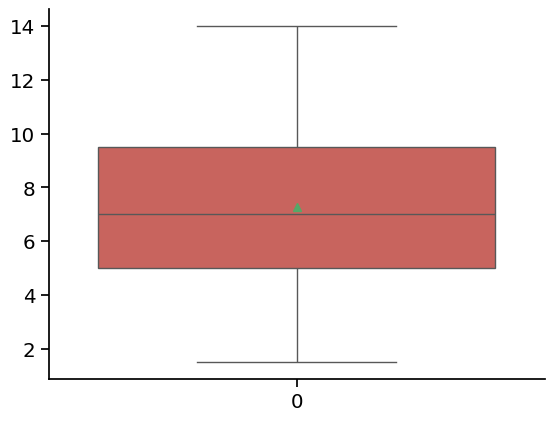

In [24]:
plot_n_boxplots([results[:, 0, 1].flatten()+base_line[:, 1].flatten()], [sns.xkcd_rgb["pale red"]])

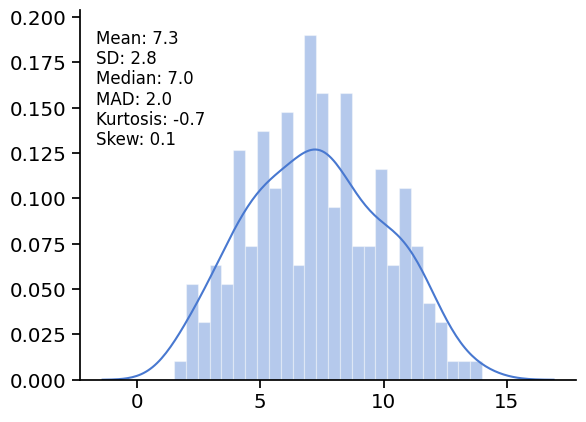

In [25]:
plot_dist_hist(results[:, 0, 1].flatten()+base_line[:, 1].flatten())
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_brain_SDX")

In [26]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\mine", results[:, 0, 1]+base_line[:, 1])

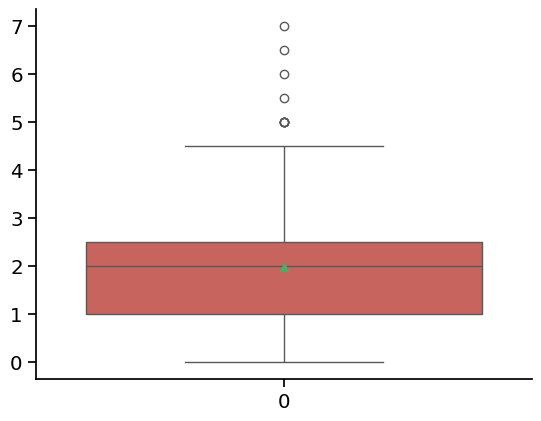

In [27]:
plot_n_boxplots([results[:, 1, 2].flatten()+base_line[:, 2].flatten()], [sns.xkcd_rgb["pale red"]])

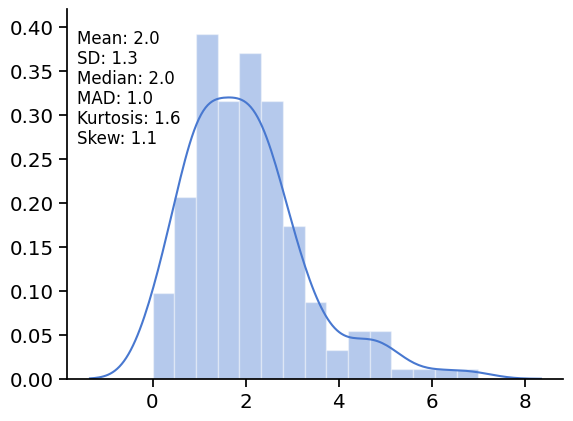

In [28]:
plot_dist_hist(results[:, 1, 2]+base_line[:, 2])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_artefact_SDX")

In [29]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\mine", results[:, 1, 2]+base_line[:, 2])

AUTOREJECT

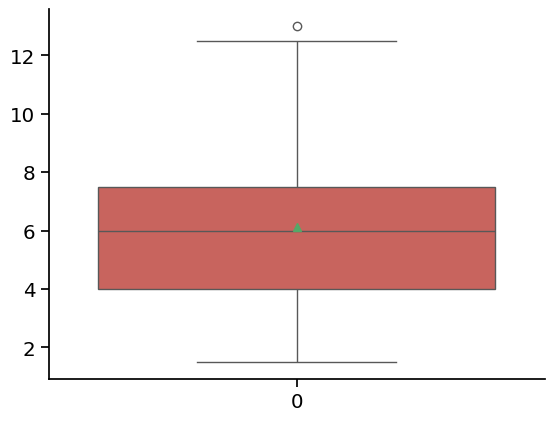

In [30]:
plot_n_boxplots([results[:, 2, 1].flatten()+base_line[:, 1].flatten()], [sns.xkcd_rgb["pale red"]])

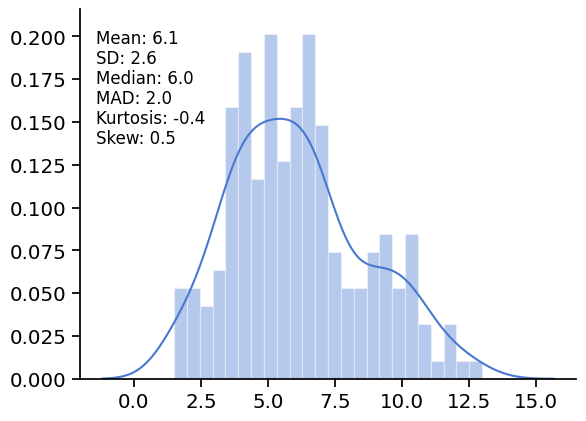

In [31]:
plot_dist_hist(results[:, 2, 1].flatten()+base_line[:, 1].flatten())
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_brain_autoreject")

In [32]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\autorej", results[:, 2, 1] +base_line[:, 1])

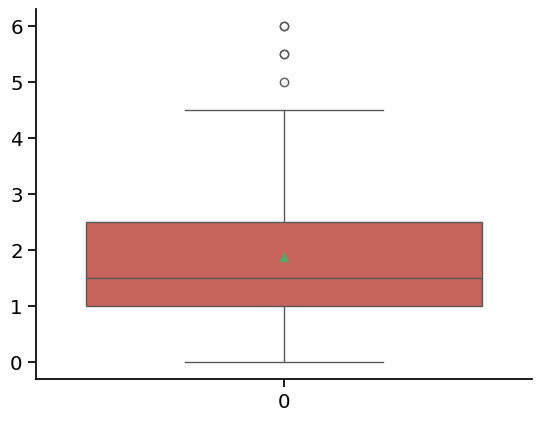

In [33]:
plot_n_boxplots([results[:, 3, 2].flatten()+base_line[:, 2].flatten()], [sns.xkcd_rgb["pale red"]])

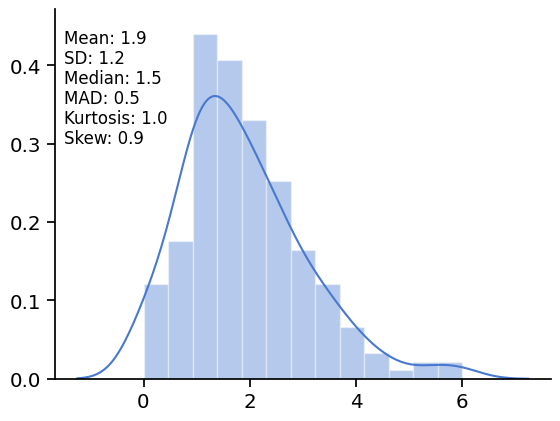

In [34]:
plot_dist_hist(results[:, 3, 2]+base_line[:, 2])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_artefact_autoreject")

In [35]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\autorej", results[:, 3, 2]+base_line[:, 2])

PREP

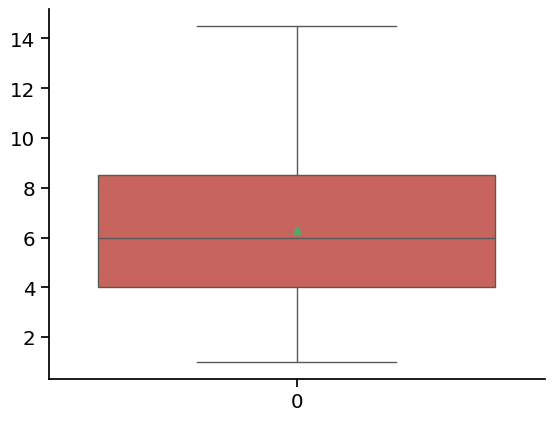

In [36]:
plot_n_boxplots([results[:, 4, 1].flatten()+base_line[:, 1].flatten()], [sns.xkcd_rgb["pale red"]])

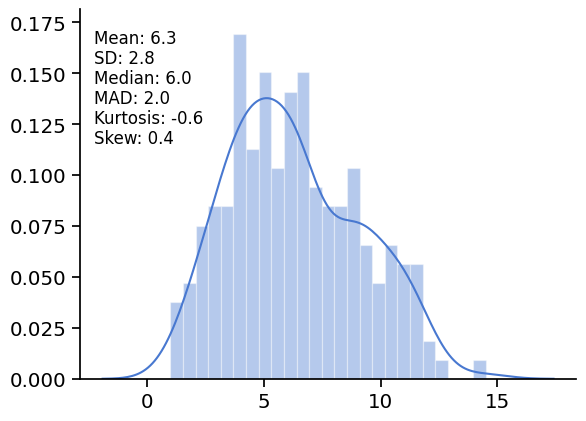

In [37]:
plot_dist_hist(results[:, 4, 1].flatten()+base_line[:, 1])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_brain_prep")

In [38]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\prep", results[:, 4, 1]+base_line[:, 1])

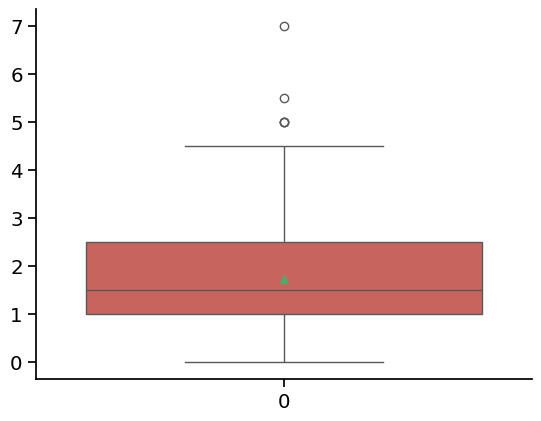

In [39]:
plot_n_boxplots([results[:, 4, 2].flatten()+base_line[:, 2].flatten()], [sns.xkcd_rgb["pale red"]])

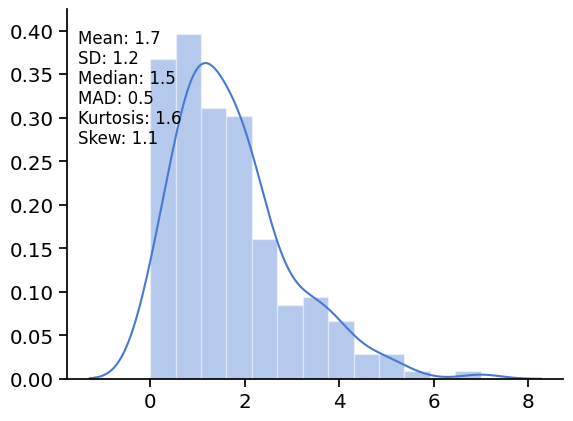

In [40]:
plot_dist_hist(results[:, 4, 2].flatten()+base_line[:, 2])
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_artefact_prep")

In [241]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\prep", results[:, 4, 2]+base_line[:, 2])

PERFORMANT DIFFS

In [93]:
test_aj_small = np.load(r"C:\Users\workbench\eirik_master\Results\test_aj_small.npy")
test_my_small = np.load(r"C:\Users\workbench\eirik_master\Results\test_my_small.npy")

In [94]:
small_diff = test_my_small-test_aj_small
big_diff = (results[:, 0, 1].flatten()+base_line[:, 1].flatten()) - (autorej_results[:, 3, 1].flatten()+base_line[:, 1].flatten())

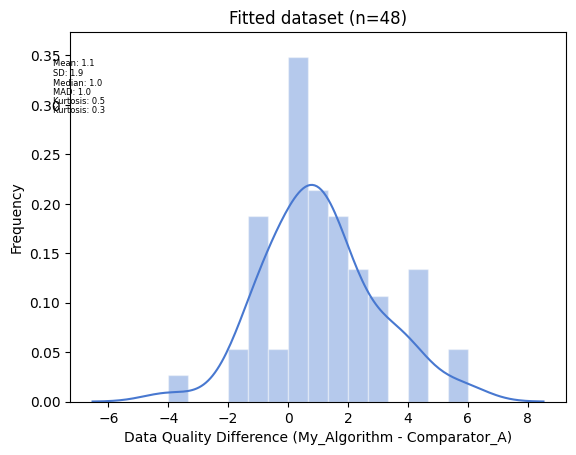

In [95]:
plot_dist_hist(small_diff, 'Fitted dataset (n=48)', 'Data Quality Difference (My_Algorithm - Comparator_A)')

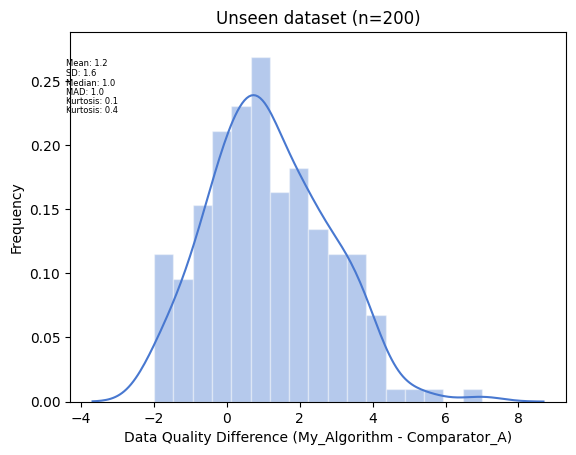

In [48]:
plot_dist_hist(big_diff, 'Unseen dataset (n=200)', 'Data Quality Difference (My_Algorithm - Comparator_A)')